# Subspace Digital Twin, Standard Stochastic Run

*Danilo Lessa Bernardineli, November 2023*

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import hvplot.pandas
import holoviews as hv
hvplot.extension('plotly')

import plotly.io as pio
pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [2]:
# from subspace_model.experiment import standard_stochastic_run
# sim_df = standard_stochastic_run()

# Load simulation results from terminal ran experiment
sim_df = pd.read_pickle(
    "../data/simulations/standard_stochastic_run-2023-12-21_21-35-24.pkl.gz"
)

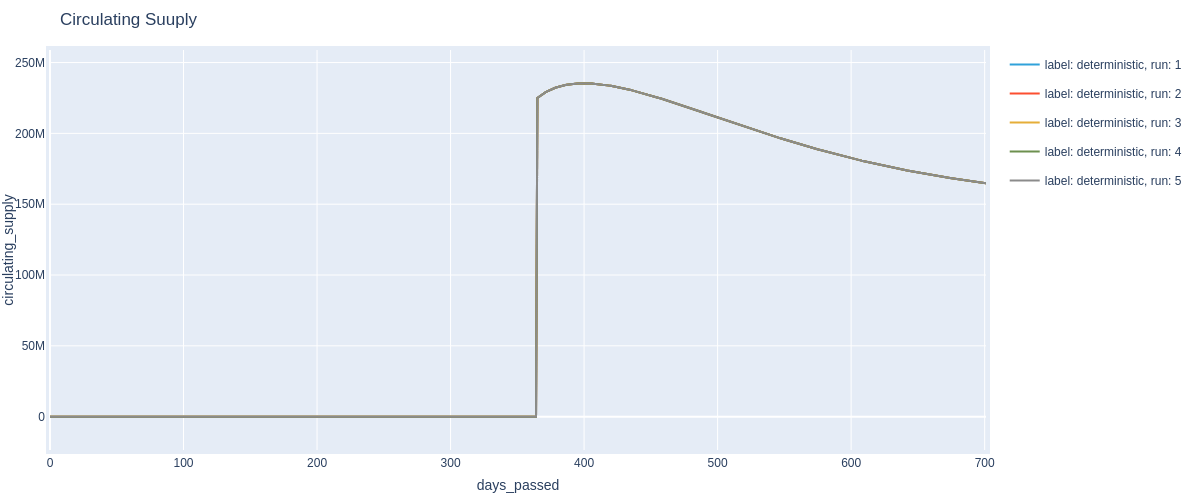

In [3]:
chart = sim_df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Circulating Suuply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

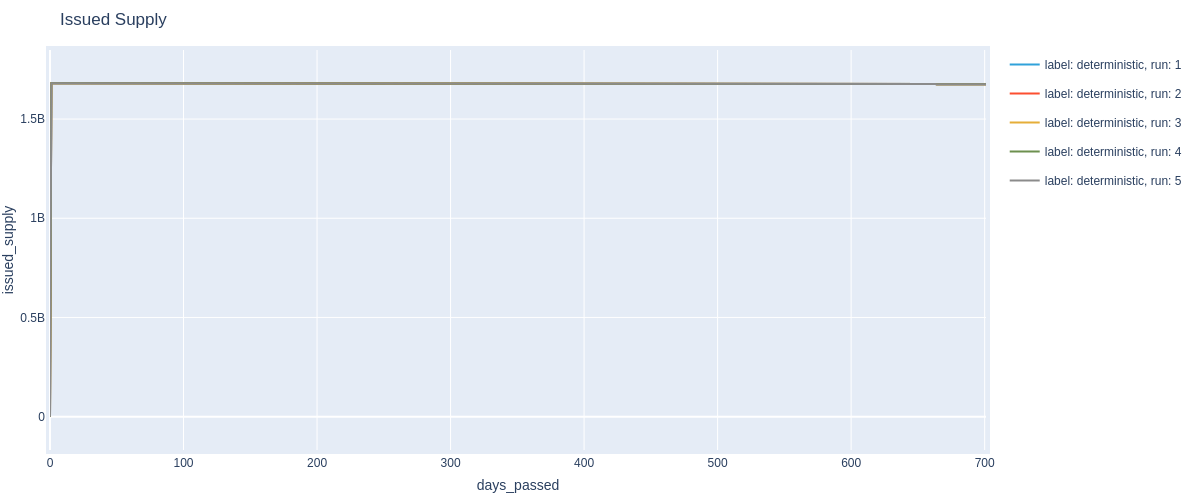

In [4]:
chart = sim_df.hvplot.line(x='days_passed', y='issued_supply', by=['label', 'run'], title='Issued Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

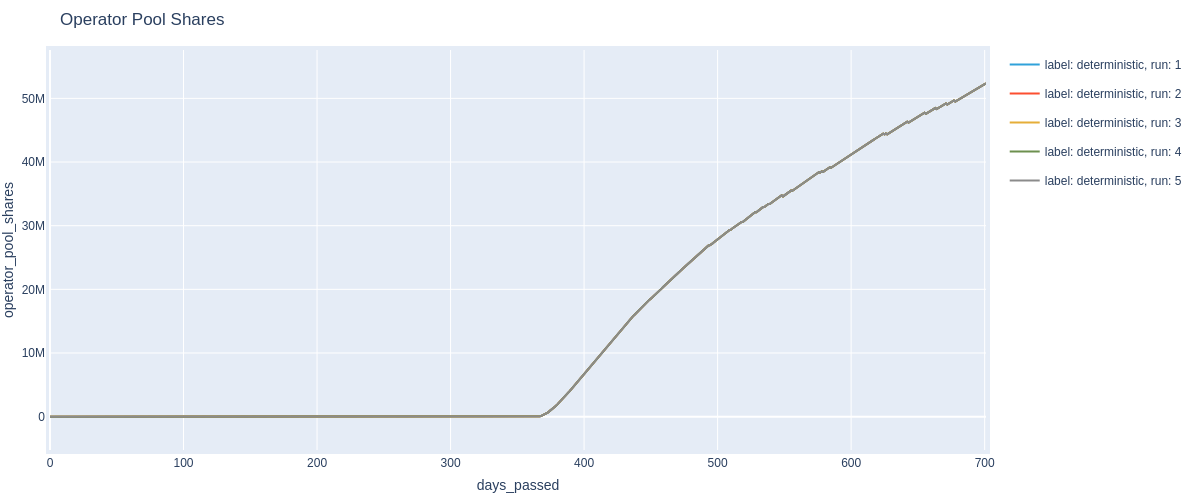

In [5]:
chart = sim_df.hvplot.line(x='days_passed', y='operator_pool_shares', by=['label', 'run'], title='Operator Pool Shares', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

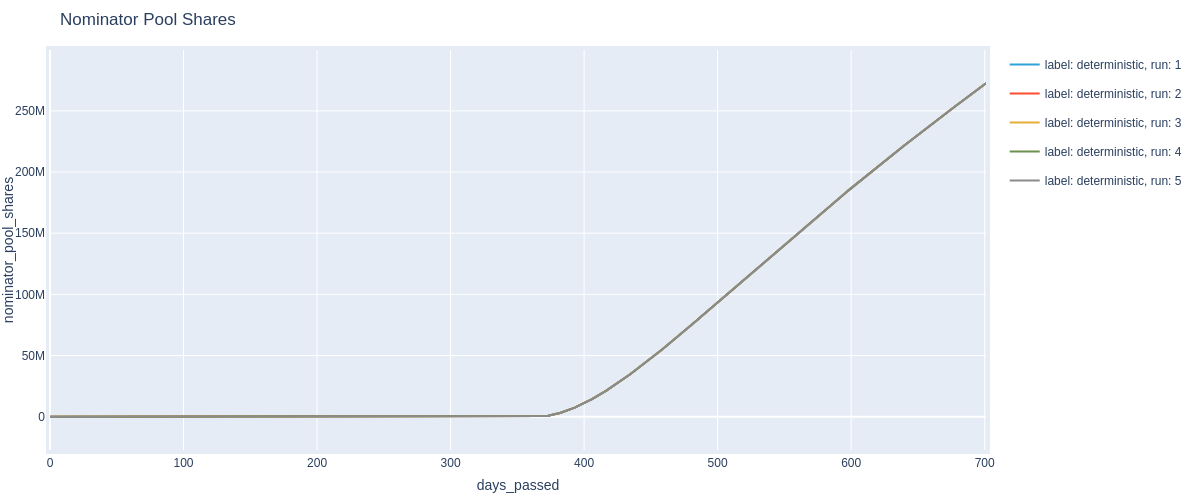

In [6]:
chart = sim_df.hvplot.line(x='days_passed', y='nominator_pool_shares', by=['label', 'run'], title='Nominator Pool Shares', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

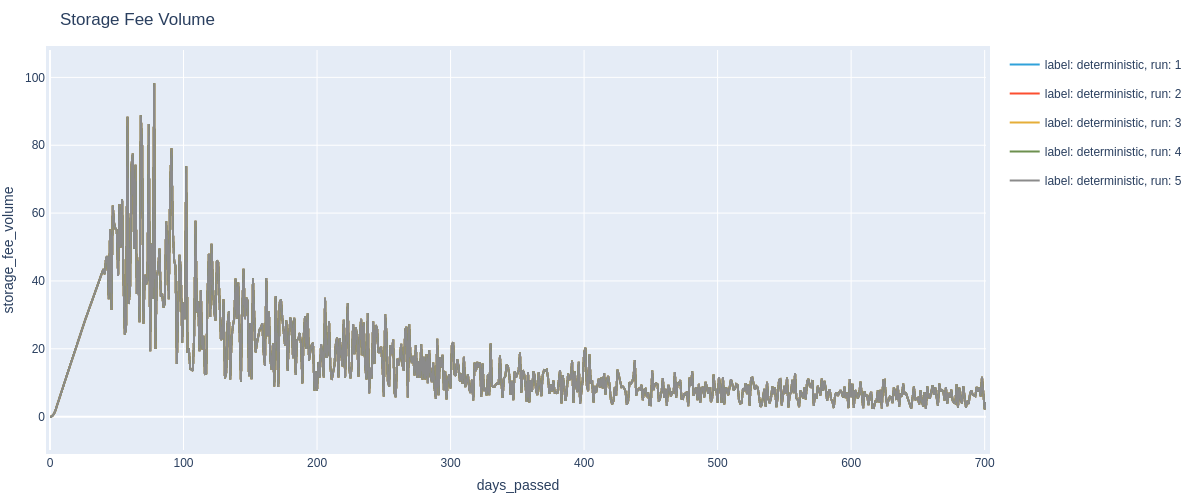

In [7]:
chart = sim_df.hvplot.line(x='days_passed', y='storage_fee_volume', by=['label', 'run'], title='Storage Fee Volume', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

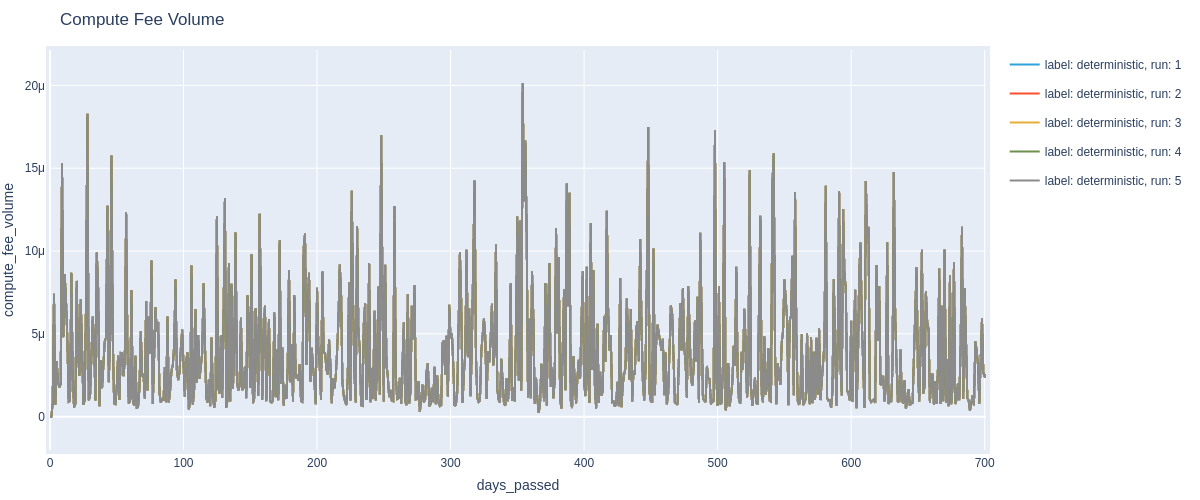

In [8]:
chart = sim_df.hvplot.line(x='days_passed', y='compute_fee_volume', by=['label', 'run'], title='Compute Fee Volume', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

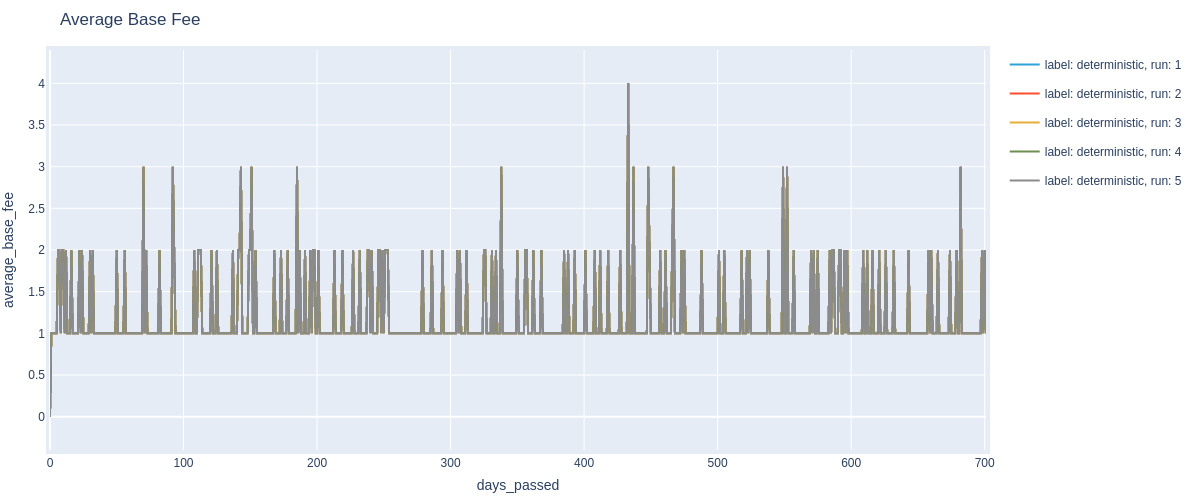

In [9]:
chart = sim_df.hvplot.line(x='days_passed', y='average_base_fee', by=['label', 'run'], title='Average Base Fee', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

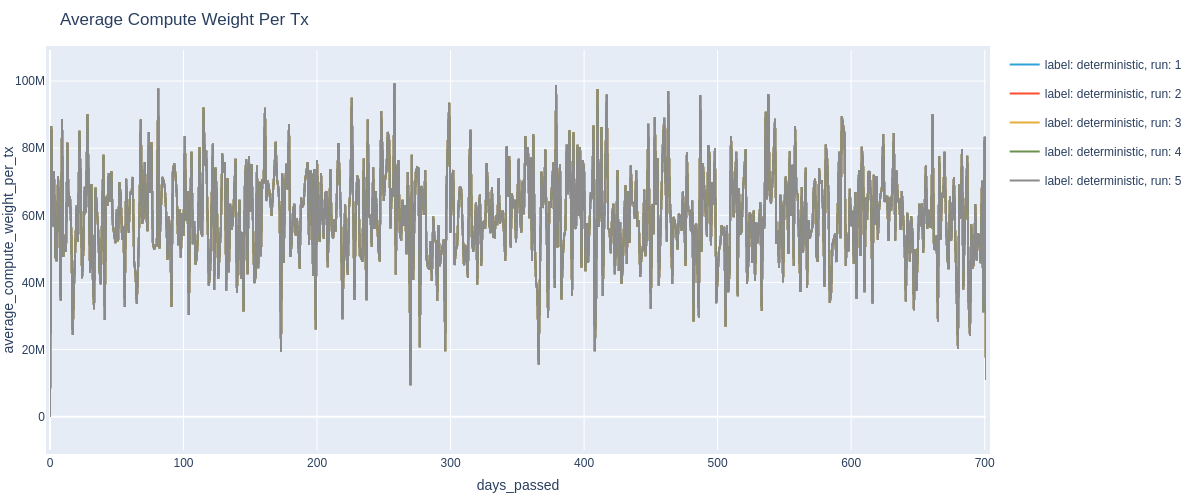

In [10]:
chart = sim_df.hvplot.line(x='days_passed', y='average_compute_weight_per_tx', by=['label', 'run'], title='Average Compute Weight Per Tx', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

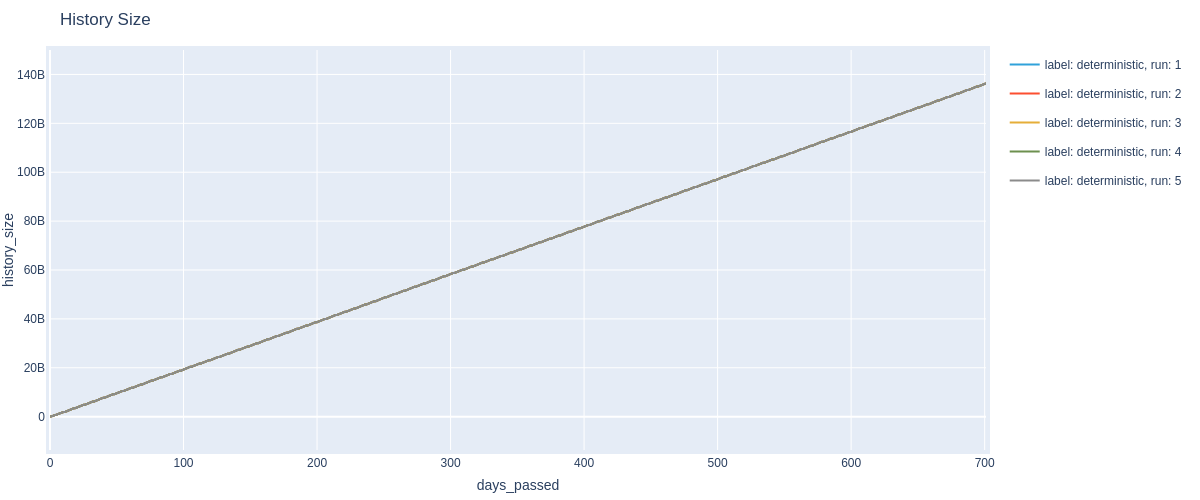

In [11]:
chart = sim_df.hvplot.line(x='days_passed', y='history_size', by=['label', 'run'], title='History Size', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

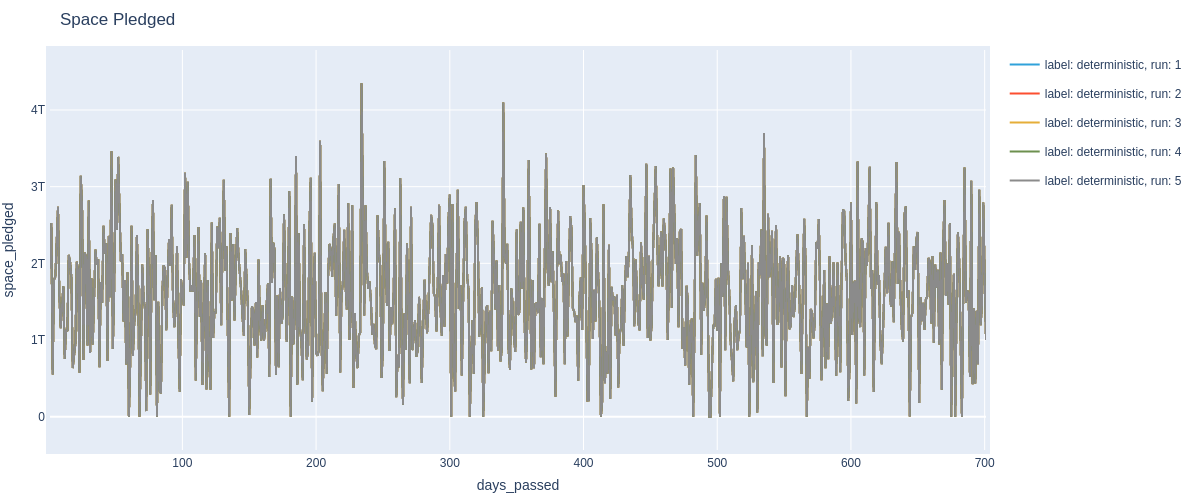

In [12]:
chart = sim_df.set_index(['days_passed', 'label', 'run']).space_pledged.diff().to_frame().query('days_passed > 0').hvplot.line(x='days_passed', y='space_pledged', by=['label', 'run'], title='Space Pledged', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

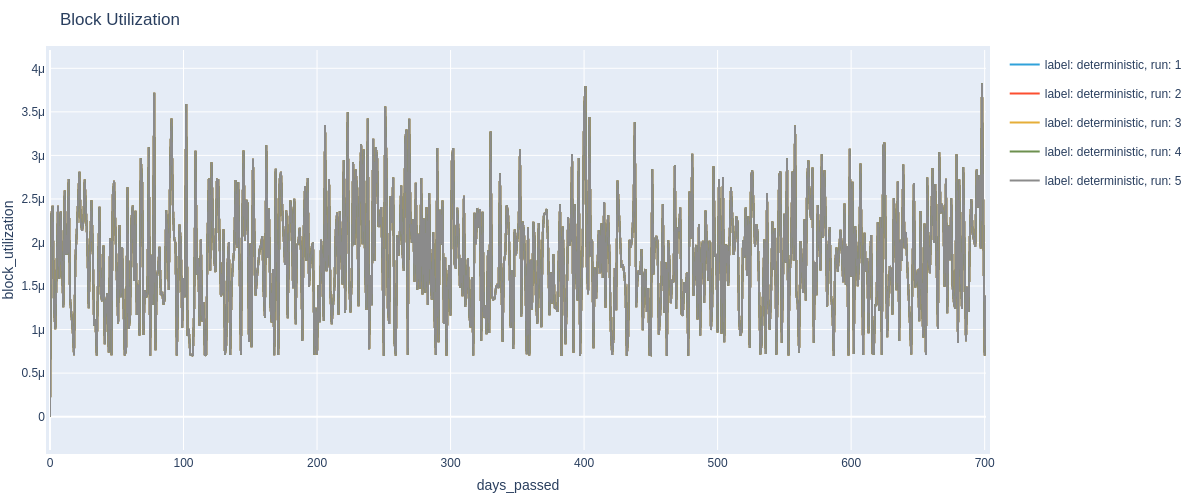

In [13]:
chart = sim_df.hvplot.line(x='days_passed', y='block_utilization', by=['label', 'run'], title='Block Utilization', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

In [14]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.set_index(['days_passed', 'label', 'run']).groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()


2023-12-21 22:33:02 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


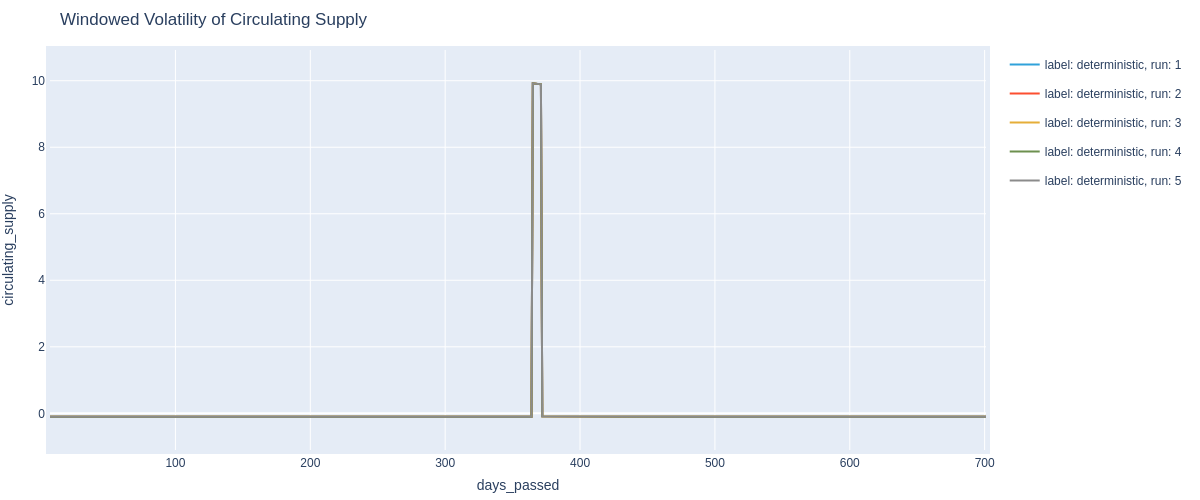

In [15]:
chart = df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Windowed Volatility of Circulating Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))